In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import calendar
from calendar import monthrange

%matplotlib inline 

In [2]:
items = pd.read_csv('olist_order_items_dataset.csv')

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [4]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [5]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [6]:
customers['customer_unique_id'].count()

99441

In [7]:
customers['customer_unique_id'].nunique()

96096

In [8]:
customers['customer_id'].nunique()

99441

In [9]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [10]:
customers_unique = customers.groupby('customer_unique_id', as_index=False)\
            .agg({'customer_id': 'count'})\
            .rename(columns={'customer_id': 'counts'})\
            .query('counts>1')\
            .sort_values('counts', ascending=True)
customers_unique

,customer_unique_id,counts
33,00172711b30d52eea8b313a7f2cced02,2
61192,a2d2201f14b81eb836de9fef6d305311,2
61200,a2d8125361b16f316df65f4603b88e23,2
61221,a2eb3545fdbc2c6687e8d66c78c206d6,2
61224,a2ee01609cebac76651bfc4814f5500e,2
...,...,...
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
23472,3e43e6105506432c953e165fb2acf44c,9


In [11]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [12]:
orders['customer_id'].nunique()

99441

In [13]:
orders['order_id'].nunique()

99441

In [14]:
orders_status_counts = orders[['order_status']]
orders_status_counts['counts'] = orders_status_counts['order_status']
orders_status_counts = orders_status_counts.groupby('order_status', as_index=False)\
                                            .agg({'counts': 'value_counts'})\
                                            .sort_values('counts', ascending=False)
orders_status_counts

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_status,counts
3,delivered,96478
6,shipped,1107
1,canceled,625
7,unavailable,609
4,invoiced,314
5,processing,301
2,created,5
0,approved,2


In [15]:
orders_delivered = orders.query('order_status=="delivered"')
orders_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [16]:
orders_canceled = orders.query('order_status=="canceled"')
orders_canceled.head(60)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1811,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaN,NaN,2018-07-03 00:00:00
1819,9021cf1919f615a121410790dcce848f,7acf55df0298e1d2c31200fb4f6fb93b,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,NaN,NaN,2018-08-22 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
1971,a39d3db795a5cf4c8b6c9dd050f0d326,ec66df2cb66dfda07c03050470e21f69,canceled,2017-03-13 16:12:24,2017-03-13 16:12:24,NaN,NaN,2017-03-30 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00


In [17]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [18]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [19]:
items['order_id'].nunique()

98666

In [20]:
orders['order_id'].nunique()

99441

In [21]:
customers.shape

(99441, 5)

In [22]:
orders.shape

(99441, 8)

In [23]:
items.shape

(112650, 7)

In [24]:
items['seller_id'].nunique()

3095

In [25]:
items_uni = items.groupby('order_id', as_index=False).agg({'product_id': 'count'})\
                                            .sort_values('product_id', ascending=False)\
                                            .rename(columns={'product_id': 'counts'})
items_uni

,order_id,counts
50137,8272b63d03f5f79c56e9e4120aec44ef,21
10459,1b15974a0141d54e36626dca3fdc731a,20
65715,ab14fdcfbe524636d65ee38360e22ce8,20
60941,9ef13efd6949e4573a18964dd1bbe7f5,15
25583,428a2f660dc84138d969ccd69a0ab6d5,15
...,...,...
34640,5a0911d70c1f85d3bed0df1bf693a6dd,1
34639,5a082b558a3798d3e36d93bfa8ca1eae,1
34637,5a07264682e0b8fbb3f166edbbffc6e8,1
34636,5a071192a28951b76774e5a760c8c9b7,1


In [26]:
fulldf = orders.merge(items_uni, how = 'left', on = 'order_id')
fulldf

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,counts
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0


In [27]:
full_nan = fulldf.query("counts =='NaN'")
full_nan

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,counts
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,NaN
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,NaN
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,NaN
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,NaN
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,NaN
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,NaN
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,NaN
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,NaN


In [28]:
fullnanstatus = full_nan[['order_status']]
fullnanstatus['counts'] = fullnanstatus['order_status']
fullnanstatus = fullnanstatus.groupby('order_status', as_index=False)\
                                            .agg({'counts': 'value_counts'})\
                                            .sort_values('counts', ascending=False)
fullnanstatus

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_status,counts
4,unavailable,603
0,canceled,164
1,created,5
2,invoiced,2
3,shipped,1


In [29]:
fullnan1 = full_nan.query("order_status =='shipped'")
fullnan1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,counts
23254,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaN,2016-12-01 00:00:00,NaN


In [30]:
fullnan1 = full_nan.query("order_status =='unavailable'")
fullnan1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,counts
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,NaN
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,NaN
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,NaN
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,NaN
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaN,NaN,2017-10-27 00:00:00,NaN
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00,NaN
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,NaN
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,NaN


In [31]:
custorders = customers.merge(orders, how = 'left', on = 'customer_id')
custorders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


# Результирующая таблица с ответом на задание 1

In [32]:
#custorders.groupby('customer_unique_id',as_index=False)\
custorders.query('order_status=="delivered"').groupby('customer_unique_id', as_index=False)\
            .agg({'customer_id': 'count'})\
            .rename(columns={'customer_id': 'counts'})\
            .query('counts==1')\
            .sort_values('counts', ascending=True)
#            .agg({'customer_id': 'count'})

,customer_unique_id,counts
0,0000366f3b9a7992bf8c76cfdf3221e2,1
62266,aa87d81170176d34f2aa2965c4ed431c,1
62265,aa873afe20fc222379673c8b6bcbac45,1
62264,aa869e19581b0fbcb10088ff7d0e5619,1
62263,aa8663555edf43be51791b3f1fa56d30,1
...,...,...
31095,5518a112dff474788c0d52cd4688acff,1
31094,55187363d85f30f921a418a1c5563832,1
31093,5517d61ee1936e47fb4f9de281d370e8,1
31158,553e08d19f15562d267d0e551cbab2d0,1


In [33]:
orders.query('order_status=="canceled"').head(50)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1811,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaN,NaN,2018-07-03 00:00:00
1819,9021cf1919f615a121410790dcce848f,7acf55df0298e1d2c31200fb4f6fb93b,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,NaN,NaN,2018-08-22 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
1971,a39d3db795a5cf4c8b6c9dd050f0d326,ec66df2cb66dfda07c03050470e21f69,canceled,2017-03-13 16:12:24,2017-03-13 16:12:24,NaN,NaN,2017-03-30 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00


In [34]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [49]:
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [50]:
ord_cancel = orders.set_index("order_estimated_delivery_date").sort_values('order_estimated_delivery_date', ascending=True)
ord_cancel = ord_cancel.fillna(-9999)
ord_cancel = ord_cancel.query('order_status=="canceled" and order_approved_at==-9999')\
                    .groupby(['order_estimated_delivery_date', 'order_status'])\
                    .agg({'order_approved_at' : 'count' }).reset_index()
               

ord_cancel = ord_cancel.set_index("order_estimated_delivery_date")
ord_cancel

,order_status,order_approved_at
order_estimated_delivery_date,,
2016-10-24,canceled,1
2016-11-14,canceled,1
2016-11-16,canceled,3
2016-11-17,canceled,1
2017-02-13,canceled,1
...,...,...
2018-10-17,canceled,1
2018-10-23,canceled,1
2018-10-25,canceled,1


In [78]:
ord_cancel1 = ord_cancel.resample(rule='M').order_approved_at.mean()
ord_cancel1 = ord_cancel1.reset_index()

In [79]:
ord_cancel1 = ord_cancel1.rename(columns={'order_approved_at': 'mean_not_paid'})
ord_cancel1

,order_estimated_delivery_date,mean_not_paid
0,2016-10-31,1.000000
1,2016-11-30,1.666667
2,2016-12-31,NaN
3,2017-01-31,NaN
4,2017-02-28,1.000000
5,2017-03-31,1.000000
6,2017-04-30,1.000000
7,2017-05-31,1.333333
8,2017-06-30,1.200000
9,2017-07-31,1.166667


In [76]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [53]:
ord_cancel2 = orders.set_index("order_estimated_delivery_date").sort_values('order_estimated_delivery_date', ascending=True)
ord_cancel2 = ord_cancel2.fillna(-9999)
ord_cancel2 = ord_cancel2.query('order_status=="canceled" and order_approved_at !=-9999 and (order_delivered_carrier_date==-9999 or order_delivered_customer_date==-9999)')\
                    .groupby(['order_estimated_delivery_date', 'order_status'])\
                    .agg({'order_purchase_timestamp' : 'count' }).reset_index()


ord_cancel2 = ord_cancel2.set_index("order_estimated_delivery_date")
ord_cancel2

,order_status,order_purchase_timestamp
order_estimated_delivery_date,,
2016-09-30,canceled,1
2016-10-25,canceled,1
2016-10-28,canceled,1
2016-11-18,canceled,3
2016-11-24,canceled,2
...,...,...
2018-08-22,canceled,6
2018-08-23,canceled,1
2018-08-24,canceled,4


In [54]:
ord_cancel2 = ord_cancel2.resample(rule='M').order_purchase_timestamp.mean()
ord_cancel2 = ord_cancel2.reset_index()


In [55]:
ord_cancel2 = ord_cancel2.rename(columns={'order_purchase_timestamp': 'mean_declined'})
ord_cancel2

,order_estimated_delivery_date,mean_declined
0,2016-09-30,1.000000
1,2016-10-31,1.000000
2,2016-11-30,2.500000
3,2016-12-31,1.400000
4,2017-01-31,NaN
5,2017-02-28,1.000000
6,2017-03-31,1.846154
7,2017-04-30,1.818182
8,2017-05-31,1.363636
9,2017-06-30,1.642857


In [56]:
ord_cancel3 = orders.set_index("order_estimated_delivery_date").sort_values('order_estimated_delivery_date', ascending=True)
ord_cancel3 = ord_cancel3.fillna(-9999)
ord_cancel3 = ord_cancel3.query('order_status=="canceled" and order_approved_at !=-9999 and order_delivered_carrier_date !=-9999 and order_delivered_customer_date !=-9999')\
                    .groupby(['order_estimated_delivery_date', 'order_status'])\
                    .agg({'order_purchase_timestamp' : 'count' }).reset_index()


ord_cancel3 = ord_cancel3.set_index("order_estimated_delivery_date")
ord_cancel3

,order_status,order_purchase_timestamp
order_estimated_delivery_date,,
2016-11-25,canceled,1
2016-11-29,canceled,1
2016-11-30,canceled,2
2016-12-08,canceled,1
2018-03-09,canceled,1


In [57]:
ord_cancel3 = ord_cancel3.resample(rule='M').order_purchase_timestamp.mean()
ord_cancel3 = ord_cancel3.reset_index()
ord_cancel3 = ord_cancel3.rename(columns={'order_purchase_timestamp': 'mean_declined_after_delivery'})

In [58]:
ord_cancel3

,order_estimated_delivery_date,mean_declined_after_delivery
0,2016-11-30,1.333333
1,2016-12-31,1.000000
2,2017-01-31,NaN
3,2017-02-28,NaN
4,2017-03-31,NaN
5,2017-04-30,NaN
6,2017-05-31,NaN
7,2017-06-30,NaN
8,2017-07-31,NaN
9,2017-08-31,NaN


In [80]:
df_canceled_fin = ord_cancel1.merge(ord_cancel2, on = 'order_estimated_delivery_date', how = 'left')
df_canceled_fin = df_canceled_fin.merge(ord_cancel3, on = 'order_estimated_delivery_date', how = 'left')
df_canceled_fin = df_canceled_fin.fillna(0)

In [84]:
df_canceled_fin = df_canceled_fin.rename(columns={'order_estimated_delivery_date': 'date'})
df_canceled_fin['date'] = df_canceled_fin['date'].dt.strftime('%m/%Y')
df_canceled_fin

,date,mean_not_paid,mean_declined,mean_declined_after_delivery
0,10/2016,1.000000,1.000000,0.000000
1,11/2016,1.666667,2.500000,1.333333
2,12/2016,0.000000,1.400000,1.000000
3,01/2017,0.000000,0.000000,0.000000
4,02/2017,1.000000,1.000000,0.000000
5,03/2017,1.000000,1.846154,0.000000
6,04/2017,1.000000,1.818182,0.000000
7,05/2017,1.333333,1.363636,0.000000
8,06/2017,1.200000,1.642857,0.000000
9,07/2017,1.166667,1.400000,0.000000


In [82]:
df_canceled_fin.dtypes

date                            datetime64[ns]
mean_not_paid                          float64
mean_declined                          float64
mean_declined_after_delivery           float64
dtype: object

# Детализация по заданию 2

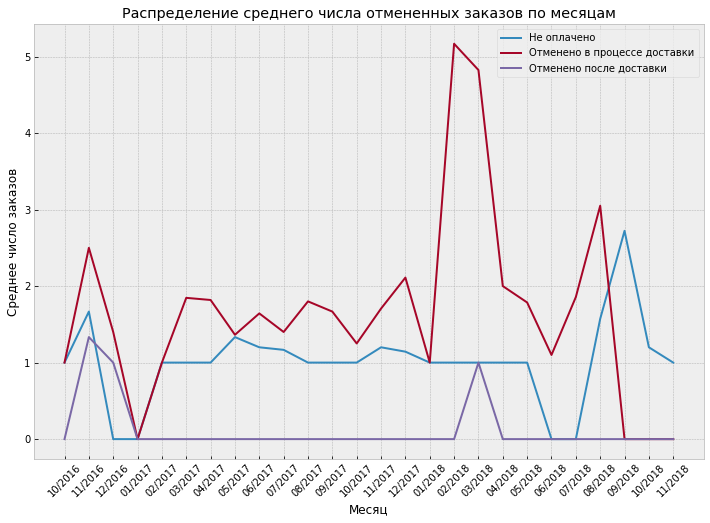

In [94]:
plt.figure(figsize=(12, 8))
plt.style.use('fast')
plt.plot(df_canceled_fin['date'], df_canceled_fin['mean_not_paid'], label='Не оплачено')
plt.plot(df_canceled_fin['date'], df_canceled_fin['mean_declined'], label='Отменено в процессе доставки')
plt.plot(df_canceled_fin['date'], df_canceled_fin['mean_declined_after_delivery'], label='Отменено после доставки')
plt.legend()
plt.xticks(rotation=45)
plt.title("Распределение среднего числа отмененных заказов по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Среднее число заказов")
plt.show()

In [ ]:
#########задание 3

In [6]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [9]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [10]:
items.order_id.count()

112650

In [11]:
items.order_id.nunique()

98666

In [12]:
items.product_id.nunique()

32951

In [13]:
orders.order_id.count()

99441

In [24]:
orders.order_id.nunique()

99441

In [32]:
dftask3 = items.merge(orders, how = 'left', on = 'order_id')
dftask3

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [33]:
dftask3.order_id.nunique()

98666

In [34]:
dftask3.order_id.count()

112650

In [44]:
dftask3.groupby('order_status', as_index=True).agg({'order_status': 'count'})

,order_status
order_status,
approved,3
canceled,542
delivered,110197
invoiced,359
processing,357
shipped,1185
unavailable,7


In [95]:
dftask3.product_id.nunique()

32951

In [122]:
dftask3['weekday'] = dftask3['order_purchase_timestamp']
dftask3['weekday'] = pd.to_datetime(dftask3['weekday'])

In [124]:
dftask3['weekday'] = dftask3['weekday'].dt.weekday

In [214]:
dftask3_1 = dftask3.groupby(['product_id', 'weekday'], as_index=True)\
                        .agg({'weekday': 'count'})\
                        .rename(columns={'weekday': 'counts'}).sort_values(['product_id', 'counts'], ascending=[False, False])

dftask3_1

counts
product_id                       weekday        
fffe9eeff12fcbd74a2f2b007dde0c58 2             1
fffdb2d0ec8d6a61f0a0a0db3f25b441 1             2
                                 3             1
                                 4             1
                                 6             1
...                                          ...
000b8f95fcb9e0096488278317764d19 2             1
                                 4             1
0009406fd7479715e4bef61dd91f2462 3             1
00088930e925c41fd95ebfe695fd2655 1             1
00066f42aeeb9f3007548bb9d3f33c38 6             1

[61230 rows x 1 columns]

In [215]:
dftask3_1.sort_values('counts', ascending=False)

counts
product_id                       weekday        
422879e10f46682990de24d770e7f83d 2            93
99a4788cb24856965c36a24e339b6058 0            92
aca2eb7d00ea1a7b8ebd4e68314663af 3            89
                                 4            87
                                 1            85
...                                          ...
9c7bdf67b06b419aefb93cfdfc96c55d 2             1
                                 4             1
                                 5             1
                                 6             1
00066f42aeeb9f3007548bb9d3f33c38 6             1

[61230 rows x 1 columns]

In [216]:
dftask3_2 = dftask3_1.reset_index()
dftask3_2

,product_id,weekday,counts
0,fffe9eeff12fcbd74a2f2b007dde0c58,2,1
1,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2
2,fffdb2d0ec8d6a61f0a0a0db3f25b441,3,1
3,fffdb2d0ec8d6a61f0a0a0db3f25b441,4,1
4,fffdb2d0ec8d6a61f0a0a0db3f25b441,6,1
...,...,...,...
61225,000b8f95fcb9e0096488278317764d19,2,1
61226,000b8f95fcb9e0096488278317764d19,4,1
61227,0009406fd7479715e4bef61dd91f2462,3,1
61228,00088930e925c41fd95ebfe695fd2655,1,1


In [223]:
dftask3_2.sort_values(['product_id', 'counts'], ascending=[True, False])

,product_id,weekday,counts
61229,00066f42aeeb9f3007548bb9d3f33c38,6,1
61228,00088930e925c41fd95ebfe695fd2655,1,1
61227,0009406fd7479715e4bef61dd91f2462,3,1
61225,000b8f95fcb9e0096488278317764d19,2,1
61226,000b8f95fcb9e0096488278317764d19,4,1
...,...,...,...
1,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2
2,fffdb2d0ec8d6a61f0a0a0db3f25b441,3,1
3,fffdb2d0ec8d6a61f0a0a0db3f25b441,4,1
4,fffdb2d0ec8d6a61f0a0a0db3f25b441,6,1


In [226]:
dftask3_3 = dftask3_2.groupby('product_id', as_index=True).agg({'counts' : 'max'})\
            .rename(columns={'counts': 'maxcount'})
dftask3_3 = dftask3_3.reset_index()
dftask3_3

,product_id,maxcount
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,1
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2


In [244]:
dftask3_merg = dftask3_2.merge(dftask3_3, how='left', on='product_id')
dftask3_merg.head(25)

,product_id,weekday,counts,maxcount
0,fffe9eeff12fcbd74a2f2b007dde0c58,2,1,1
1,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2,2
2,fffdb2d0ec8d6a61f0a0a0db3f25b441,3,1,2
3,fffdb2d0ec8d6a61f0a0a0db3f25b441,4,1,2
4,fffdb2d0ec8d6a61f0a0a0db3f25b441,6,1,2
5,fff9553ac224cec9d15d49f5a263411f,4,1,1
6,fff81cc3158d2725c0655ab9ba0f712c,0,1,1
7,fff6177642830a9a94a0f2cba5e476d1,5,1,1
8,fff6177642830a9a94a0f2cba5e476d1,6,1,1
9,fff515ea94dbf35d54d256b3e39f0fea,6,1,1


In [257]:
dftask3_merg1 = dftask3_merg.query('counts==maxcount')
dftask3_merg1

,product_id,weekday,counts,maxcount
0,fffe9eeff12fcbd74a2f2b007dde0c58,2,1,1
1,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2,2
5,fff9553ac224cec9d15d49f5a263411f,4,1,1
6,fff81cc3158d2725c0655ab9ba0f712c,0,1,1
7,fff6177642830a9a94a0f2cba5e476d1,5,1,1
...,...,...,...,...
61225,000b8f95fcb9e0096488278317764d19,2,1,1
61226,000b8f95fcb9e0096488278317764d19,4,1,1
61227,0009406fd7479715e4bef61dd91f2462,3,1,1
61228,00088930e925c41fd95ebfe695fd2655,1,1,1


In [258]:
dftask3_merg1

,product_id,weekday,counts,maxcount
0,fffe9eeff12fcbd74a2f2b007dde0c58,2,1,1
1,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2,2
5,fff9553ac224cec9d15d49f5a263411f,4,1,1
6,fff81cc3158d2725c0655ab9ba0f712c,0,1,1
7,fff6177642830a9a94a0f2cba5e476d1,5,1,1
...,...,...,...,...
61225,000b8f95fcb9e0096488278317764d19,2,1,1
61226,000b8f95fcb9e0096488278317764d19,4,1,1
61227,0009406fd7479715e4bef61dd91f2462,3,1,1
61228,00088930e925c41fd95ebfe695fd2655,1,1,1


# Результирующая таблица, содержащая ответ на поставленный вопрос задания 3

In [260]:
dftask3_merg2 = dftask3_merg1.groupby('product_id')['weekday'].apply(list).reset_index()
dftask3_merg2

,product_id,weekday
0,00066f42aeeb9f3007548bb9d3f33c38,[6]
1,00088930e925c41fd95ebfe695fd2655,[1]
2,0009406fd7479715e4bef61dd91f2462,[3]
3,000b8f95fcb9e0096488278317764d19,"[2, 4]"
4,000d9be29b5207b54e86aa1b1ac54872,[1]
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,"[5, 6]"
32947,fff81cc3158d2725c0655ab9ba0f712c,[0]
32948,fff9553ac224cec9d15d49f5a263411f,[4]
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,[1]


In [ ]:
##################################### задание 4 ###########################################################

In [6]:
dftask4 = items.merge(orders, how = 'left', on = 'order_id')
dftask4 = dftask4.merge(customers, how = 'left', on = 'customer_id')

In [8]:
dftask4.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [12]:
dftask4.customer_unique_id.nunique()

95420

In [13]:
customers.customer_unique_id.nunique()

96096

In [25]:
dftask44 = dftask4.groupby(['customer_unique_id', 'order_purchase_timestamp'], as_index=False)\
                    .agg({'order_id': 'count'})\
                    .rename(columns={'order_id': 'quantity'})\
                    .sort_values('customer_unique_id', ascending=False)
dftask44

,customer_unique_id,order_purchase_timestamp,quantity
98380,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-02 20:18:45,1
98379,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1
98378,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1
98377,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1
98376,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2
...,...,...,...
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1


In [28]:
dftask44['order_purchase_timestamp'] = pd.to_datetime(dftask44['order_purchase_timestamp'])

In [29]:
dftask44.dtypes

customer_unique_id                  object
order_purchase_timestamp    datetime64[ns]
quantity                             int64
dtype: object

In [67]:
dftask44['months'] = dftask44['order_purchase_timestamp']
dftask44['months'] = dftask44['months'].dt.strftime('%m/%Y')
dftask44

,customer_unique_id,order_purchase_timestamp,quantity,months
98380,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-02 20:18:45,1,05/2017
98379,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,05/2018
98378,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,02/2017
98377,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,12/2017
98376,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2,06/2017
...,...,...,...,...
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,11/2017
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,10/2017
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,03/2017
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,05/2018


In [68]:
#dftask44['days_in_month'] = dftask44['order_purchase_timestamp'].dt.days_in_month

dftask44.dtypes

customer_unique_id                  object
order_purchase_timestamp    datetime64[ns]
quantity                             int64
months                              object
dtype: object

In [69]:
dftask44

,customer_unique_id,order_purchase_timestamp,quantity,months
98380,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-02 20:18:45,1,05/2017
98379,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,05/2018
98378,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,02/2017
98377,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,12/2017
98376,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2,06/2017
...,...,...,...,...
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,11/2017
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,10/2017
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,03/2017
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,05/2018


In [72]:
dftask444 = dftask44.groupby(['customer_unique_id', 'months'], as_index=False)\
                    .agg({'quantity': sum})\
                    .sort_values('quantity', ascending=False)
dftask444

,customer_unique_id,months,quantity
76234,c8460e4251689ba205045f3ea17884a1,08/2018,24
26387,4546caea018ad8c692964e3382debd19,07/2017,21
40214,698e1cf81d01a3d389d96145f7fa6df8,08/2017,20
74614,c402f431464c72e27330a67f7b94d4fb,02/2018,20
5860,0f5ac8d5c31de21d2f25e24be15bbffb,11/2017,18
...,...,...,...
34260,59c71ab83d120ac9d6d593a285ac6feb,08/2018,1
34259,59c563fd93584a1d6e0ae388ce89f5f6,04/2017,1
34258,59c42c0487267d67e7fd375d68819f81,06/2017,1
34257,59c4294186b35d084e67f0112c7a1449,01/2018,1


In [87]:
dftask444['avg_by_week'] = dftask444['quantity']/(pd.to_datetime(dftask44['months']).dt.days_in_month/7)
dftask444 = dftask444.sort_values('customer_unique_id', ascending=False)

# Результирующая таблица, содержащая ответ на задание 4

In [89]:
dftask444

,customer_unique_id,months,quantity,avg_by_week
0,ffffd2657e2aad2907e67c3e9daecbeb,05/2017,1,0.225806
1,ffff5962728ec6157033ef9805bacc48,05/2018,1,0.225806
2,ffff371b4d645b6ecea244b27531430a,02/2017,1,0.225806
3,fffea47cd6d3cc0a88bd621562a9d061,12/2017,1,0.225806
4,fffcf5a5ff07b0908bd4e2dbc735a684,06/2017,2,0.466667
...,...,...,...,...
97314,0004aac84e0df4da2b147fca70cf8255,11/2017,1,0.233333
97315,0000f6ccb0745a6a4b88665a16c9f078,10/2017,1,0.233333
97316,0000f46a3911fa3c0805444483337064,03/2017,1,0.233333
97317,0000b849f77a49e4a4ce2b2a4ca5be3f,05/2018,1,0.225806


In [ ]:
###################################               5.1 когортный анализ ###########################################

In [26]:
dftask51 = items.merge(orders, how = 'left', on = 'order_id')
dftask51 = dftask51.merge(customers, how = 'left', on = 'customer_id')

In [27]:
dftask51.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [28]:
dftask51.shape

(112650, 18)

In [29]:
dftask5 = dftask51[['order_id', 'customer_unique_id', 'order_purchase_timestamp']]

In [30]:
dftask5

,order_id,customer_unique_id,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-23 13:57:06
112646,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14 10:26:46
112647,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-23 17:07:56
112648,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-14 23:02:59


In [31]:
dftask5['order_purchase_timestamp'].agg(['min', 'max'])

min    2016-09-04 21:15:19
max    2018-09-03 09:06:57
Name: order_purchase_timestamp, dtype: object

In [32]:
dftask5.dtypes

order_id                    object
customer_unique_id          object
order_purchase_timestamp    object
dtype: object

In [33]:
dftask5['order_purchase_timestamp'] = pd.to_datetime(dftask5['order_purchase_timestamp'], format='%Y-%m-%d')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
dftask5.dtypes

order_id                            object
customer_unique_id                  object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [36]:
dftask5['purchase_month'] = dftask5['order_purchase_timestamp'].astype('datetime64[M]')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
dftask5.dtypes

order_id                            object
customer_unique_id                  object
order_purchase_timestamp    datetime64[ns]
purchase_month              datetime64[ns]
dtype: object

,order_id,customer_unique_id,order_purchase_timestamp,purchase_month
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,2017-09-01
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,2017-04-01
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,2018-01-01
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,2018-08-01
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51,2017-02-01
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-23 13:57:06,2018-04-01
112646,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14 10:26:46,2018-07-01
112647,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-23 17:07:56,2017-10-01
112648,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-14 23:02:59,2017-08-01


In [41]:
dftask5.groupby(['purchase_month'])['customer_unique_id'].agg(['count', 'nunique']).reset_index()

,purchase_month,count,nunique
0,2016-09-01,6,3
1,2016-10-01,363,305
2,2016-12-01,1,1
3,2017-01-01,955,755
4,2017-02-01,1951,1708
5,2017-03-01,3000,2601
6,2017-04-01,2684,2359
7,2017-05-01,4136,3588
8,2017-06-01,3583,3154
9,2017-07-01,4519,3894


In [48]:
users_min = dftask5.groupby('customer_unique_id')['purchase_month'].min().reset_index()

In [49]:
users_min

,customer_unique_id,purchase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01
95417,ffff371b4d645b6ecea244b27531430a,2017-02-01
95418,ffff5962728ec6157033ef9805bacc48,2018-05-01


In [50]:
min_month = dftask5['purchase_month'].min()
max_month = dftask5['purchase_month'].max()

In [62]:
month = pd.DataFrame(pd.date_range(min_month, max_month, freq='MS'))

In [65]:
month.columns = ['month']

In [66]:
month

,month
0,2016-09-01
1,2016-10-01
2,2016-11-01
3,2016-12-01
4,2017-01-01
5,2017-02-01
6,2017-03-01
7,2017-04-01
8,2017-05-01
9,2017-06-01


In [68]:
users_min['key'] = 1
month['key'] =1

In [72]:
template_kohort = users_min.merge(month, on='key')[['customer_unique_id', 'purchase_month', 'month']]

In [77]:
template_kohort = template_kohort[template_kohort['month']>= template_kohort['purchase_month']]

In [78]:
template_kohort

,customer_unique_id,purchase_month,month
20,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01
21,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01
22,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01
23,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01
24,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01
...,...,...,...
2385495,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-05-01
2385496,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-06-01
2385497,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-07-01
2385498,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-08-01


In [82]:
purchases = dftask5.groupby(['customer_unique_id', 'purchase_month'])['order_purchase_timestamp'].count().reset_index()

In [86]:
purchases.columns = ['customer_unique_id', 'month', 'count']

In [100]:
purchases

,customer_unique_id,month,count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1
...,...,...,...
97314,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,2
97315,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1
97316,ffff371b4d645b6ecea244b27531430a,2017-02-01,1
97317,ffff5962728ec6157033ef9805bacc48,2018-05-01,1


In [101]:
report=template_kohort.merge(purchases, on=['customer_unique_id', 'month'], how='left')

In [102]:
report['yes'] = 1*(report['count'] > 0)

In [119]:
report.columns = ['customer_unique_id', 'first_purchase_month', 'month', 'count', 'yes']

In [120]:
report

,customer_unique_id,first_purchase_month,month,count,yes
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01,1.0,1
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01,NaN,0
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01,NaN,0
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01,NaN,0
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01,NaN,0
...,...,...,...,...,...
905249,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-05-01,NaN,0
905250,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-06-01,NaN,0
905251,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-07-01,NaN,0
905252,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-08-01,NaN,0


In [155]:
report_table = report.pivot_table(index='first_purchase_month', columns='month',values = 'yes', aggfunc='mean')

In [156]:
report_table

month,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,...,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01
first_purchase_month,,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2016-10-01,NaN,1.0,0.0,0.0,0.0,0.000000,0.000000,0.003279,0.000000,0.000000,...,0.000000,0.003279,0.000000,0.003279,0.000000,0.006557,0.006557,0.000000,0.000000,0.00000
2016-12-01,NaN,NaN,NaN,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2017-01-01,NaN,NaN,NaN,NaN,1.0,0.003979,0.002653,0.001326,0.003979,0.001326,...,0.001326,0.006631,0.003979,0.001326,0.001326,0.002653,0.003979,0.000000,0.001326,0.00000
2017-02-01,NaN,NaN,NaN,NaN,NaN,1.000000,0.002346,0.002933,0.001173,0.004106,...,0.001173,0.002933,0.001173,0.001760,0.001173,0.000587,0.000587,0.002346,0.000000,0.00000
2017-03-01,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.005010,0.003468,0.003854,...,0.000771,0.003854,0.001156,0.002312,0.001156,0.001541,0.002312,0.000771,0.001541,0.00000
2017-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.005985,0.002138,...,0.002993,0.001710,0.002565,0.000855,0.000855,0.000428,0.000855,0.000855,0.001710,0.00000
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.004775,...,0.001404,0.002528,0.002809,0.002528,0.003371,0.002528,0.000281,0.001966,0.002528,0.00000
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,0.003854,0.002248,0.001285,0.002248,0.003211,0.003532,0.001606,0.001285,0.001927,0.00000


In [157]:
ur_style = (report_table
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis', vmin=0.0001, vmax=0.005)  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.3%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

month,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00
first_purchase_month,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:00,100.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%
2016-10-01 00:00:00,,100.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.328%,0.000%,0.000%,0.328%,0.000%,0.328%,0.000%,0.328%,0.000%,0.328%,0.000%,0.328%,0.000%,0.656%,0.656%,0.000%,0.000%,0.000%
2016-12-01 00:00:00,,,,100.000%,100.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%
2017-01-01 00:00:00,,,,,100.000%,0.398%,0.265%,0.133%,0.398%,0.133%,0.398%,0.133%,0.133%,0.000%,0.398%,0.133%,0.663%,0.398%,0.133%,0.133%,0.265%,0.398%,0.000%,0.133%,0.000%
2017-02-01 00:00:00,,,,,,100.000%,0.235%,0.293%,0.117%,0.411%,0.117%,0.235%,0.176%,0.117%,0.176%,0.117%,0.293%,0.117%,0.176%,0.117%,0.059%,0.059%,0.235%,0.000%,0.000%
2017-03-01 00:00:00,,,,,,,100.000%,0.501%,0.347%,0.385%,0.347%,0.154%,0.154%,0.308%,0.347%,0.077%,0.385%,0.116%,0.231%,0.116%,0.154%,0.231%,0.077%,0.154%,0.000%
2017-04-01 00:00:00,,,,,,,,100.000%,0.599%,0.214%,0.171%,0.342%,0.257%,0.342%,0.299%,0.299%,0.171%,0.257%,0.086%,0.086%,0.043%,0.086%,0.086%,0.171%,0.000%
2017-05-01 00:00:00,,,,,,,,,100.000%,0.478%,0.478%,0.393%,0.309%,0.337%,0.421%,0.140%,0.253%,0.281%,0.253%,0.337%,0.253%,0.028%,0.197%,0.253%,0.000%
2017-06-01 00:00:00,,,,,,,,,,100.000%,0.482%,0.353%,0.385%,0.257%,0.385%,0.385%,0.225%,0.128%,0.225%,0.321%,0.353%,0.161%,0.128%,0.193%,0.000%


In [173]:
ur_style.to_excel("pivot.xlsx")

#  RFM-анализ 

In [8]:
### 1. делаем сводную таблицу 

In [14]:
dftask6 = items.merge(orders, how = 'left', on = 'order_id')
dftask6 = dftask6.merge(customers, how = 'left', on = 'customer_id')

In [15]:
dftask6

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [16]:
### фильтруем данные, чтобы оценивать только доставленные заказы
dftask6 = dftask6.query('order_status=="delivered"')

In [17]:
dftask6

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [18]:
df6 = dftask6[['customer_unique_id', 'order_id', 'order_item_id', 'price', 'order_delivered_customer_date']]

In [19]:
df6

,customer_unique_id,order_id,order_item_id,price,order_delivered_customer_date
0,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,2017-09-20 23:43:48
1,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,1,239.90,2017-05-12 16:04:24
2,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,1,199.00,2018-01-22 13:19:16
3,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,1,12.99,2018-08-14 13:32:39
4,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,2017-03-01 16:42:31
...,...,...,...,...,...
112645,0c9aeda10a71f369396d0c04dce13a64,fffc94f6ce00a00581880bf54a75a037,1,299.99,2018-05-10 22:56:40
112646,0da9fe112eae0c74d3ba1fe16de0988b,fffcd46ef2263f404302a634eb57f7eb,1,350.00,2018-07-23 20:31:55
112647,cd79b407828f02fdbba457111c38e4c4,fffce4705a9662cd70adb13d4a31832d,1,99.90,2017-10-28 12:22:22
112648,eb803377c9315b564bdedad672039306,fffe18544ffabc95dfada21779c9644f,1,55.99,2017-08-16 21:59:40


In [20]:
df6['order_delivered_customer_date'] = pd.to_datetime(df6['order_delivered_customer_date'])
df6.dtypes

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


customer_unique_id                       object
order_id                                 object
order_item_id                             int64
price                                   float64
order_delivered_customer_date    datetime64[ns]
dtype: object

In [21]:
df6_grouped = df6.groupby('customer_unique_id', as_index=False)\
.agg({'price': 'sum', 'order_delivered_customer_date': ['nunique', 'min', 'max'] })
df6_grouped

customer_unique_id    price  \
                                             sum   
0      0000366f3b9a7992bf8c76cfdf3221e2   129.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f    18.90   
2      0000f46a3911fa3c0805444483337064    69.00   
3      0000f6ccb0745a6a4b88665a16c9f078    25.99   
4      0004aac84e0df4da2b147fca70cf8255   180.00   
...                                 ...      ...   
93353  fffcf5a5ff07b0908bd4e2dbc735a684  1570.00   
93354  fffea47cd6d3cc0a88bd621562a9d061    64.89   
93355  ffff371b4d645b6ecea244b27531430a    89.90   
93356  ffff5962728ec6157033ef9805bacc48   115.00   
93357  ffffd2657e2aad2907e67c3e9daecbeb    56.99   

      order_delivered_customer_date                                          
                            nunique                 min                 max  
0                                 1 2018-05-16 20:48:37 2018-05-16 20:48:37  
1                                 1 2018-05-10 18:02:42 2018-05-10 18:02:42  
2                                 1 2017-04-05 14:38:47 2017-04-05 14:38:47  
3                                 1 2017-11-01 21:23:05 2017-11-01 21:23:05  
4                                 1 2017-11-27 23:08:56 2017-11-27 23:08:56  
...                             ...                 ...                 ...  
93353                             1 2017-07-06 09:22:00 2017-07-06 09:22:00  
93354                             1 2018-01-09 22:28:20 2018-01-09 22:28:20  
93355                             1 2017-02-22 12:45:04 2017-02-22 12:45:04  
93356                             1 2018-05-14 11:54:26 2018-05-14 11:54:26  
93357                             1 2017-05-10 09:33:48 2017-05-10 09:33:48  

[93358 rows x 5 columns]

In [22]:
df6_grouped.columns = ['customer_unique_id', 'monetary', 'frequency', 'deliver_time_min', 'deliver_time_max']

In [23]:
df6_grouped

,customer_unique_id,monetary,frequency,deliver_time_min,deliver_time_max
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,2018-05-16 20:48:37,2018-05-16 20:48:37
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,2018-05-10 18:02:42,2018-05-10 18:02:42
2,0000f46a3911fa3c0805444483337064,69.00,1,2017-04-05 14:38:47,2017-04-05 14:38:47
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,2017-11-01 21:23:05,2017-11-01 21:23:05
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,2017-11-27 23:08:56,2017-11-27 23:08:56
...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1,2017-07-06 09:22:00,2017-07-06 09:22:00
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89,1,2018-01-09 22:28:20,2018-01-09 22:28:20
93355,ffff371b4d645b6ecea244b27531430a,89.90,1,2017-02-22 12:45:04,2017-02-22 12:45:04
93356,ffff5962728ec6157033ef9805bacc48,115.00,1,2018-05-14 11:54:26,2018-05-14 11:54:26


In [24]:
df6_grouped = df6_grouped.query('frequency>0')
df6_grouped

,customer_unique_id,monetary,frequency,deliver_time_min,deliver_time_max
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,2018-05-16 20:48:37,2018-05-16 20:48:37
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,2018-05-10 18:02:42,2018-05-10 18:02:42
2,0000f46a3911fa3c0805444483337064,69.00,1,2017-04-05 14:38:47,2017-04-05 14:38:47
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,2017-11-01 21:23:05,2017-11-01 21:23:05
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,2017-11-27 23:08:56,2017-11-27 23:08:56
...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1,2017-07-06 09:22:00,2017-07-06 09:22:00
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89,1,2018-01-09 22:28:20,2018-01-09 22:28:20
93355,ffff371b4d645b6ecea244b27531430a,89.90,1,2017-02-22 12:45:04,2017-02-22 12:45:04
93356,ffff5962728ec6157033ef9805bacc48,115.00,1,2018-05-14 11:54:26,2018-05-14 11:54:26


In [25]:
df6_grouped['deliver_time_max'].max()

Timestamp('2018-10-17 13:22:46')

In [26]:
max_time = df6_grouped['deliver_time_max'].max() + pd.Timedelta(days=1)
max_time

Timestamp('2018-10-18 13:22:46')

In [27]:
df6_grouped['recency'] = max_time -  df6_grouped['deliver_time_max']

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df6_grouped['recency'] = df6_grouped['recency'].round('D')
df6_grouped

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_unique_id,monetary,frequency,deliver_time_min,deliver_time_max,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,2018-05-16 20:48:37,2018-05-16 20:48:37,155 days
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,2018-05-10 18:02:42,2018-05-10 18:02:42,161 days
2,0000f46a3911fa3c0805444483337064,69.00,1,2017-04-05 14:38:47,2017-04-05 14:38:47,561 days
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,2017-11-01 21:23:05,2017-11-01 21:23:05,351 days
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,2017-11-27 23:08:56,2017-11-27 23:08:56,325 days
...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1,2017-07-06 09:22:00,2017-07-06 09:22:00,469 days
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89,1,2018-01-09 22:28:20,2018-01-09 22:28:20,282 days
93355,ffff371b4d645b6ecea244b27531430a,89.90,1,2017-02-22 12:45:04,2017-02-22 12:45:04,603 days
93356,ffff5962728ec6157033ef9805bacc48,115.00,1,2018-05-14 11:54:26,2018-05-14 11:54:26,157 days


In [29]:
df6_final = df6_grouped[['customer_unique_id', 'monetary', 'frequency', 'recency']]
df6_final

,customer_unique_id,monetary,frequency,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,155 days
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,161 days
2,0000f46a3911fa3c0805444483337064,69.00,1,561 days
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,351 days
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,325 days
...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1,469 days
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89,1,282 days
93355,ffff371b4d645b6ecea244b27531430a,89.90,1,603 days
93356,ffff5962728ec6157033ef9805bacc48,115.00,1,157 days


In [30]:
df6_final['monetary'].describe()

count    93350.000000
mean       141.620235
std        215.702028
min          0.850000
25%         47.650000
50%         89.700000
75%        154.697500
max      13440.000000
Name: monetary, dtype: float64

In [31]:
df6_final['frequency'].describe()

count    93350.000000
mean         1.033380
std          0.209011
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: frequency, dtype: float64

In [32]:
df6_final['recency'].describe()

count                          93350
mean     274 days 23:57:21.731119444
std      151 days 20:55:07.706329154
min                  1 days 00:00:00
25%                154 days 00:00:00
50%                254 days 00:00:00
75%                385 days 00:00:00
max                737 days 00:00:00
Name: recency, dtype: object

In [33]:
np.quantile(df6_final['recency'], 0.5)

numpy.timedelta64(21945600000000000,'ns')

In [34]:
df6_final['recency'] = pd.to_numeric(df6_final['recency'].dt.days, downcast='integer')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df6_final.dtypes

customer_unique_id     object
monetary              float64
frequency               int64
recency                 int16
dtype: object

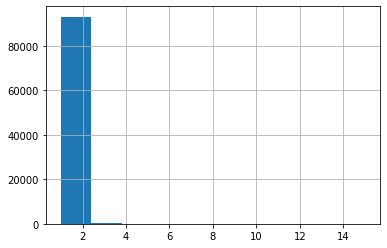

In [36]:
df6_final['frequency'].hist()

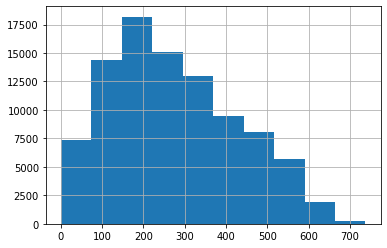

In [37]:
df6_final['recency'].hist()

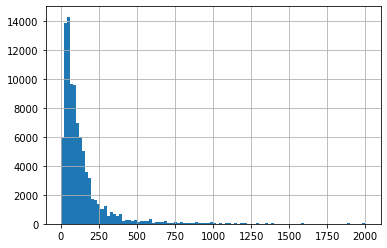

In [38]:
df6_final['monetary'].hist(range = [0, 2000], log =  False, bins = 100)

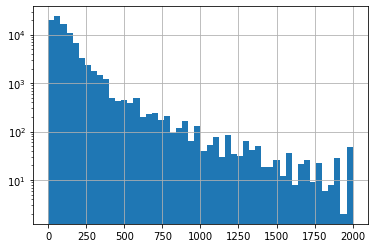

In [39]:
df6_final['monetary'].hist(range = [0, 2000], log =  True, bins = 50)

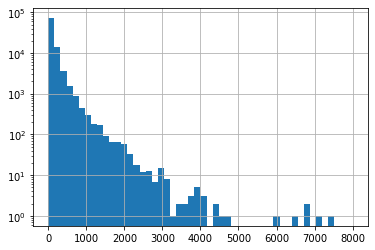

In [40]:
df6_final['monetary'].hist(range = [0, 8000], log =  True, bins = 50)

In [41]:
monetary_log = np.log10(df6_final['monetary'])
monetary_log

0        2.113609
1        1.276462
2        1.838849
3        1.414806
4        2.255273
           ...   
93353    3.195900
93354    1.812178
93355    1.953760
93356    2.060698
93357    1.755799
Name: monetary, Length: 93350, dtype: float64

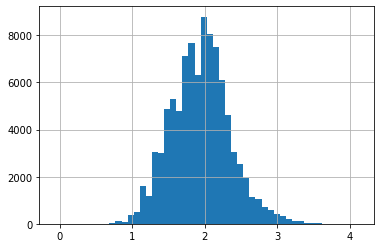

In [42]:
monetary_log.hist(bins=50)

In [43]:
aaa = monetary_log.quantile([.2, .4, .6, .8])
aaaa = 10**aaa
aaaa

0.2     39.9
0.4     69.9
0.6    109.9
0.8    179.9
Name: monetary, dtype: float64

In [44]:
aaa

0.2    1.600973
0.4    1.844477
0.6    2.040998
0.8    2.255031
Name: monetary, dtype: float64

In [45]:
df6_final.query('monetary>2000')

,customer_unique_id,monetary,frequency,recency
256,00adeda9b742746c0c66e10d00ea1b74,2078.50,1,338
289,00c07da5ba0e07b4f248a3a373b07476,2258.00,1,69
416,011875f0176909c5cf0b14a9138bb691,3999.90,1,573
1023,02ccceb879088a0253e1e46e0200bdb8,2338.08,1,64
1067,02e8a66528e84b3ca6150d9b1e03a26f,2110.00,1,113
...,...,...,...,...
91238,fa094305fdb6062436c99adba7d53dde,2198.00,1,84
91326,fa562ef24d41361e476e748681810e1e,4099.99,1,195
92018,fc54c2c09aee36da48881e5bf37ef795,2680.00,1,301
93001,ff0ae98646e7bbb41cf0f0d3991fef98,2999.89,1,489


In [46]:
df6_final.query('monetary>3200')

,customer_unique_id,monetary,frequency,recency
416,011875f0176909c5cf0b14a9138bb691,3999.90,1,573
1282,03796b63235e0e0a299084988c662c7e,3549.00,1,596
3724,0a0a92112bd4c708ca5fde585afaa872,13440.00,1,366
16162,2c3b08cf3584d8c0a81d9618a73aa219,3399.99,1,188
23375,3fec1a05177762f279472253113d568a,3700.00,1,199
23411,4007669dec559734d6f53e029e360987,5934.60,1,309
25436,459bef486812aa25204be022145caa62,6729.00,1,64
26640,48e1ac109decbb87765a3eade6854098,4590.00,1,105
32276,58483a1c055dfb600f57c5b867174542,3899.00,1,128
32881,59d66d72939bc9497e19d89c61a96d5f,3459.00,2,420


In [47]:
df6_final.query('monetary>5000')

,customer_unique_id,monetary,frequency,recency
3724,0a0a92112bd4c708ca5fde585afaa872,13440.0,1,366
23411,4007669dec559734d6f53e029e360987,5934.6,1,309
25436,459bef486812aa25204be022145caa62,6729.0,1,64
43168,763c8b1c9c68a0229c42c9fc6f662b93,7160.0,1,84
79636,da122df9eeddfedc1dc1f5349a1a690c,7388.0,2,549
80463,dc4802a71eae9be1dd28f5d788ceb526,6735.0,1,594
93081,ff4159b92c40ebe40454e3e6a7c35ed6,6499.0,1,500


In [60]:
zzz = df6_final.groupby('frequency', as_index=False).agg({'monetary': 'count'})
zzz.columns = ['frequency', 'count']
zzz

,frequency,count
0,1,90553
1,2,2569
2,3,181
3,4,28
4,5,9
5,6,5
6,7,3
7,9,1
8,15,1


<b> Проанализировав данные по частотам покупок пользователей, можно понять, что основная масса покупателей (97%) совершает покупку один раз и не возвращается. Разобьем пользователей на три группы: кто сделал одну покупку, кто сделал 2-3 покупки и кто сделал более трех покупок <br> для recency и monetary разобьем на 5 групп по квантилям

In [49]:
quintiles = df6_final[['recency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 129.0, 0.4: 210.0, 0.6: 301.40000000000146, 0.8: 420.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [50]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def m_score(x):
    if x <= quintiles['monetary'][.2]:
        return 1
    elif x <= quintiles['monetary'][.4]:
        return 2
    elif x <= quintiles['monetary'][.6]:
        return 3
    elif x <= quintiles['monetary'][.8]:
        return 4
    else:
        return 5
    
def f_score(x):
    if x <= 1:
        return 1
    elif x <= 3:
        return 2
    else:
        return 3

In [51]:
df6_final['R'] = df6_final['recency'].apply(lambda x: r_score(x))
df6_final['F'] = df6_final['frequency'].apply(lambda x: f_score(x))
df6_final['M'] = df6_final['monetary'].apply(lambda x: m_score(x))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df6_final

,customer_unique_id,monetary,frequency,recency,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,155,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,161,4,1,1
2,0000f46a3911fa3c0805444483337064,69.00,1,561,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,351,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,325,2,1,5
...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1,469,1,1,5
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89,1,282,3,1,2
93355,ffff371b4d645b6ecea244b27531430a,89.90,1,603,1,1,3
93356,ffff5962728ec6157033ef9805bacc48,115.00,1,157,4,1,4


In [53]:
df6_final['RFM Score'] = df6_final['R'].map(str) + df6_final['F'].map(str) + df6_final['M'].map(str)

In [54]:
df6_final

,customer_unique_id,monetary,frequency,recency,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,155,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,161,4,1,1,411
2,0000f46a3911fa3c0805444483337064,69.00,1,561,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,351,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,325,2,1,5,215
...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1,469,1,1,5,115
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89,1,282,3,1,2,312
93355,ffff371b4d645b6ecea244b27531430a,89.90,1,603,1,1,3,113
93356,ffff5962728ec6157033ef9805bacc48,115.00,1,157,4,1,4,414


In [55]:
segt_map = {
    r'[1-2][1]': 'One-time users',
    r'[1-2][2-3]': 'Lost',
     r'31': 'Sleeping',
    r'32': 'Attention zone',
    r'33': 'Danger zone',
    r'[4-5]1': 'Newbies',
    r'[4-5]2': 'Potentional VIP',
    r'[4-5]3': 'VIP'
}

df6_final['Segment'] = df6_final['R'].map(str) + df6_final['F'].map(str)
df6_final['Segment'] = df6_final['Segment'].replace(segt_map, regex=True)

In [56]:
df6_final

,customer_unique_id,monetary,frequency,recency,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,155,4,1,4,414,Newbies
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,161,4,1,1,411,Newbies
2,0000f46a3911fa3c0805444483337064,69.00,1,561,1,1,2,112,One-time users
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,351,2,1,1,211,One-time users
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,325,2,1,5,215,One-time users
...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1,469,1,1,5,115,One-time users
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89,1,282,3,1,2,312,Sleeping
93355,ffff371b4d645b6ecea244b27531430a,89.90,1,603,1,1,3,113,One-time users
93356,ffff5962728ec6157033ef9805bacc48,115.00,1,157,4,1,4,414,Newbies


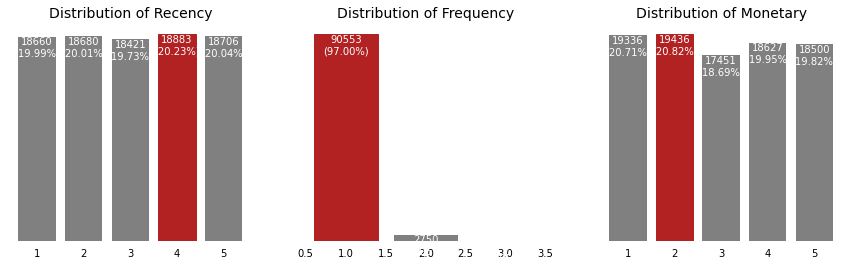

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, p in enumerate(['R', 'F', 'M']):
    parameters = {'R':'Recency', 'F':'Frequency', 'M':'Monetary'}
    y = df6_final[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='grey')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'. format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({:.2f}%)'.format(int(value), float(value*100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

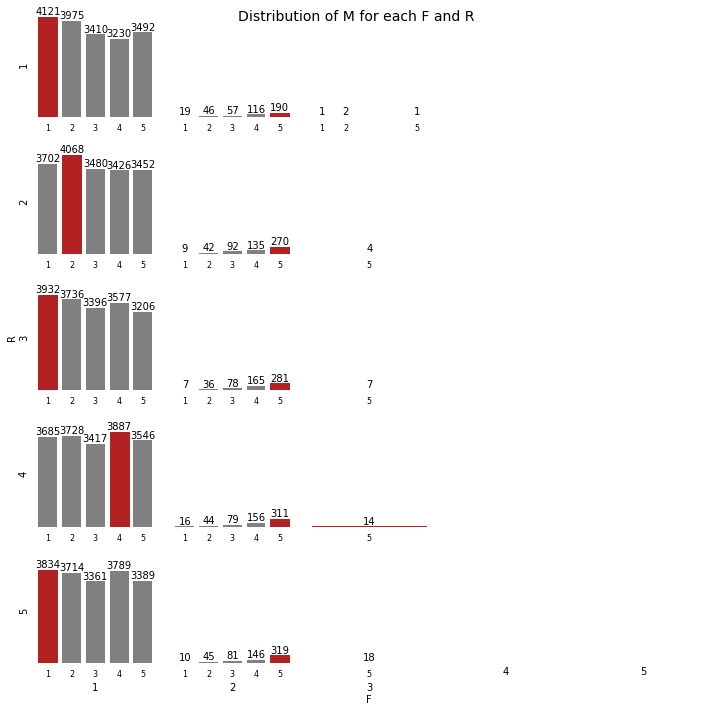

In [58]:
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = df6_final[(df6_final['R'] == r) & (df6_final['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='grey')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

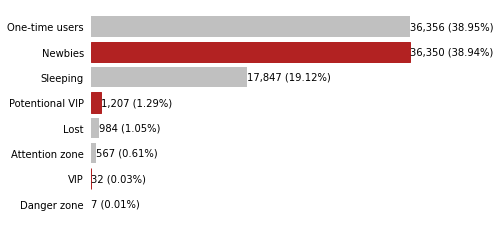

In [59]:
segments_counts = df6_final['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Newbies', 'Potentional VIP', 'VIP']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:.2f}%)'.format(int(value),
                                   float(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()